(18, 65)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(65, 65)
         13117007 function calls (13115624 primitive calls) in 24.834 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       29    0.000    0.000   25.388    0.875 C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3288(run_code)
       29    0.000    0.000   25.388    0.875 {built-in method builtins.exec}
        1    0.125    0.125   25.207   25.207 <ipython-input-2-59481b3f673a>:19(<module>)
     1171    2.782    0.002   24.893    0.021 C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\npyio.py:1543(genfromtxt)
     1171    0.006    0.000   15.302    0.013 C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\_datasource.py:228(open)
     1171    0.010    0.000   15.252    0.013 C:\Users\User\Anaconda3\lib\site-packages\nump

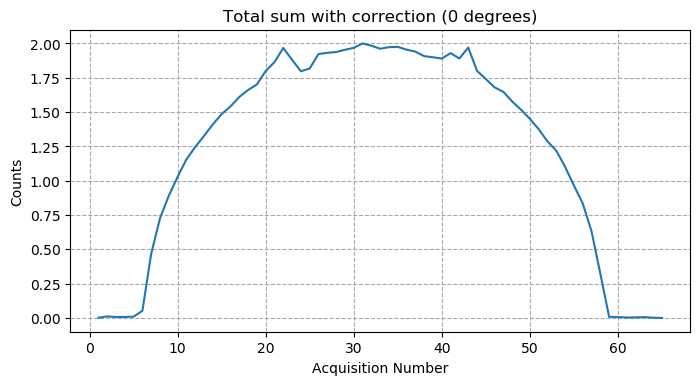

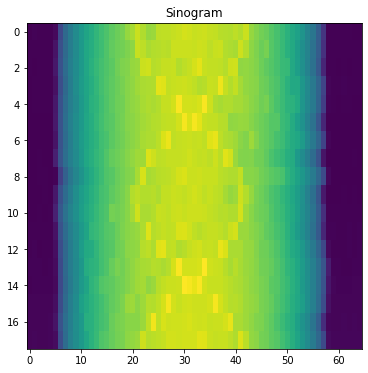

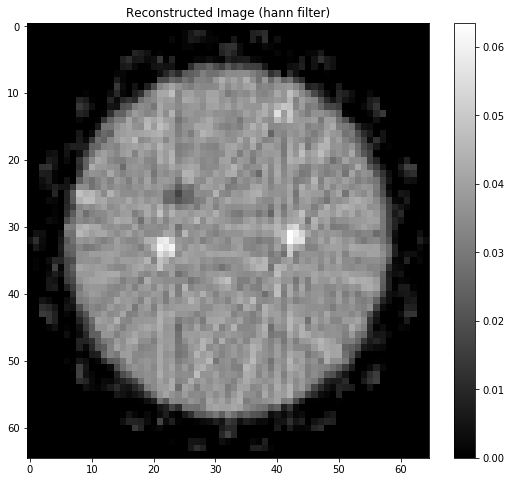

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from matplotlib.pyplot import figure
from skimage.transform import iradon
import cProfile, pstats, io
from pstats import SortKey

pr = cProfile.Profile()
pr.enable()

#Air scan
airscan_counts= sum(genfromtxt("Desktop/CT imaging/17-5-2021/air scan.mca", skip_header=12,skip_footer=71))

tot_counts=[]
tot_counts.clear()
tot_counts_=[]
avg_counts=[]
for i in np.arange(0,360,20):
    for j in np.arange(1,66):
        counts = genfromtxt("Desktop/CT imaging/17-5-2021/angle_{:d}_acq_{:02d}.mca".format(i,j), skip_header=12,skip_footer=71)
        avg_counts.append(-np.log(sum(counts)/airscan_counts))
        counts=0
    tot_counts.append(avg_counts)
    avg_counts=[]
print(np.shape(tot_counts))
    
x= np.arange(1,66)

tot_counts=np.array(tot_counts)
figure(1,figsize=(8, 4), dpi=100)
plt.plot(x,tot_counts[0])
plt.xlabel('Acquisition Number')
plt.ylabel('Counts')
plt.title('Total sum with correction (0 degrees)')
plt.grid(color='darkgrey',linestyle='--')

#sinogram
figure(2,figsize=(6,6))
plt.imshow(tot_counts,aspect='auto')
plt.title('Sinogram')

tot_counts=np.transpose(tot_counts)
#image reconstruction
theta=np.arange(0,360,20)
image=iradon(tot_counts,theta=theta)
image[image<0] = 0
figure(3,figsize=(9,8))
plt.imshow(image,aspect='auto',cmap='gray')
plt.colorbar()
plt.title('Reconstructed Image (hann filter)')
print(image)
print(np.shape(image))

pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())